## Explore if the disease status convolutes the disease score

In [2]:
library(data.table)
library(ggplot2)

## RA

### Get results

In [3]:
data_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
meta_data <- readRDS(paste0(data_dir, "meta_qc_amp2RA_exp_norm_2023_06_13.rds"))

output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
cell_score <- data.frame(fread(paste0(output_dir, "RA.score.gz")))



In [4]:
rownames(cell_score) <- cell_score$V1
cell_score <- cell_score[meta_data$cell,]
identical(cell_score$V1, meta_data$cell)
meta_data <- cbind(meta_data, cell_score)
any(is.na(cell_score))

[1] TRUE

[1] FALSE

In [5]:
meta_data[1:2,]

,sample,cell,cluster_number,cluster_name,cell_type,subject_id,percent.mito,nGene,nUMI,redcap_data_access_group,⋯,sex,RA_duration_years,Race_white,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,BRI-401,BRI-401_AAGACTCCATTATGCG,B-1,B-1: CD24++CD27+IgM+ unswitched memory,B cell,300-0302,0.1215055,1986,7333,cedars,⋯,1,2.054795,1,BRI-401_AAGACTCCATTATGCG,0.08435727,0.3737726,0.3246753,0.3448862,0.4623242,0.3991640
BRI-401_ACACAGTGTAACACGG,BRI-401,BRI-401_ACACAGTGTAACACGG,B-2,B-2: IgM+IgD+TCL1A+ naive,B cell,300-0302,0.1307667,1700,6156,cedars,⋯,1,2.054795,1,BRI-401_ACACAGTGTAACACGG,0.07990883,-0.1678585,0.5634366,0.5562323,0.2547438,-0.1414235


[1] "sample"                   "cell"                    
 [3] "cluster_number"           "cluster_name"            
 [5] "cell_type"                "subject_id"              
 [7] "percent.mito"             "nGene"                   
 [9] "nUMI"                     "redcap_data_access_group"
[11] "age"                      "sex"                     
[13] "RA_duration_years"        "Race_white"              
[15] "V1"                       "raw_score"               
[17] "norm_score"               "mc_pval"                 
[19] "pval"                     "nlog10_pval"             
[21] "zscore"

0%        25%        50%        75%       100% 
 0.0000000  0.1287671  1.8821918 12.6904110 40.9315068

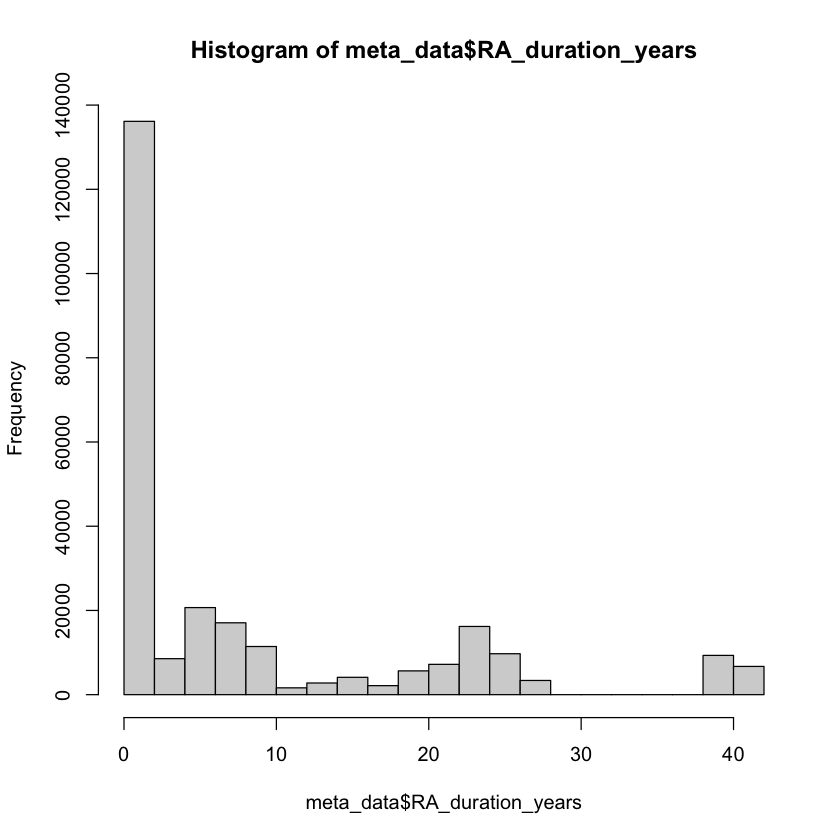

In [6]:
colnames(meta_data)
quantile(meta_data$RA_duration_years)
hist(meta_data$RA_duration_years)

### Do cells from patients with different durations of RA distribute evenly across cell states?

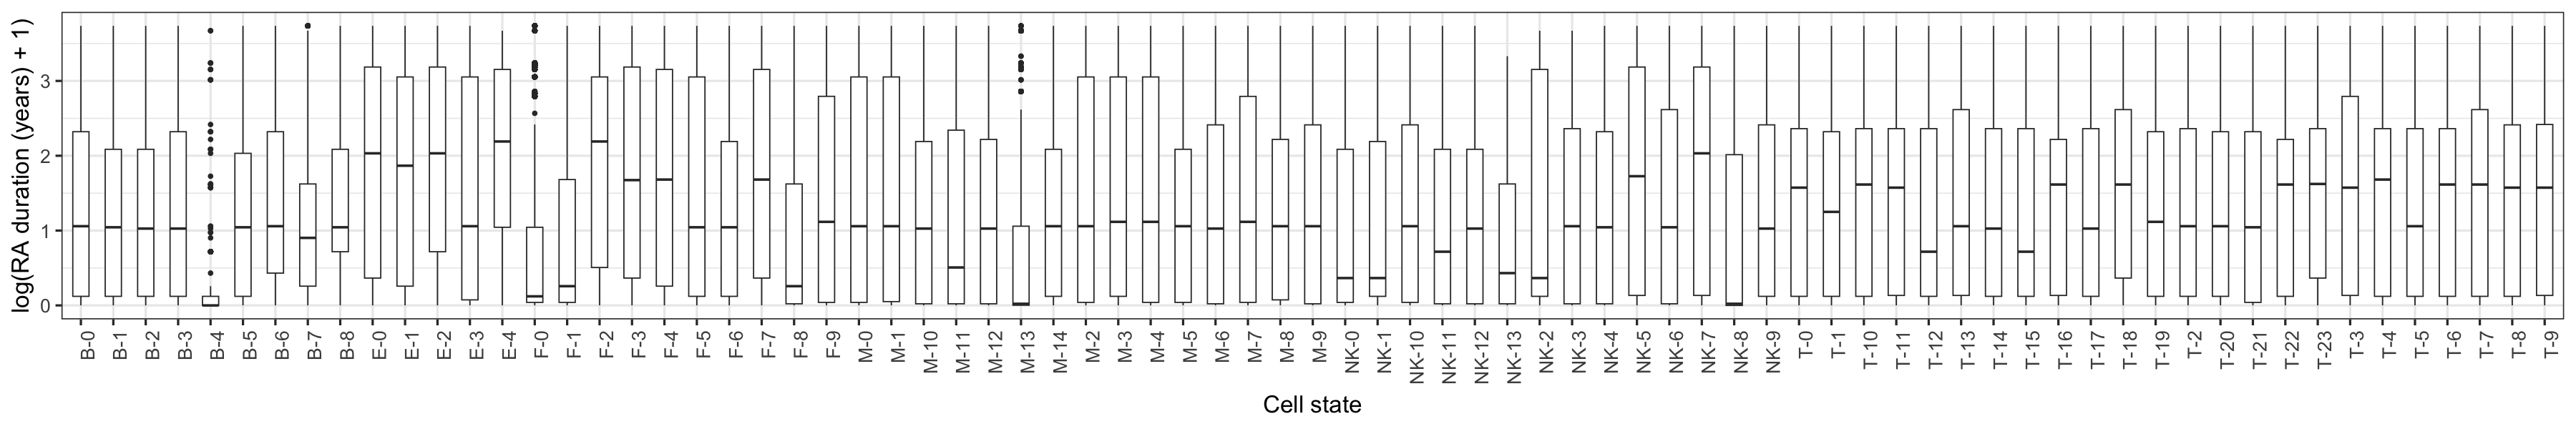

In [7]:
options(repr.plot.height=5, repr.plot.width=30)
ggplot(data=meta_data, aes(x=cluster_number, y=log(RA_duration_years+1))) + #geom_violin() + 
geom_boxplot(width=0.5) + 
theme_bw(base_size=20) + labs(x="Cell state", y="log(RA duration (years) + 1)") + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# significant differences: B-4, F-0, M-13?

In [8]:
# get the RA duration years in blocks
meta_data$RA_duration_block <- "100"
meta_data[meta_data$RA_duration_years == 0,]$RA_duration_block <- "0"
meta_data[meta_data$RA_duration_years != 0 & meta_data$RA_duration_years < 10,]$RA_duration_block <- "0-10"
meta_data[meta_data$RA_duration_years >=10 & meta_data$RA_duration_years < 20,]$RA_duration_block <- "10-20"
meta_data[meta_data$RA_duration_years >= 20 & meta_data$RA_duration_years < 30,]$RA_duration_block <- "20-30"
meta_data[meta_data$RA_duration_years > 30,]$RA_duration_block <- "30+"

table(meta_data$RA_duration_block)


     0   0-10  10-20  20-30    30+ 
 23124 170742  16301  36493  16036 

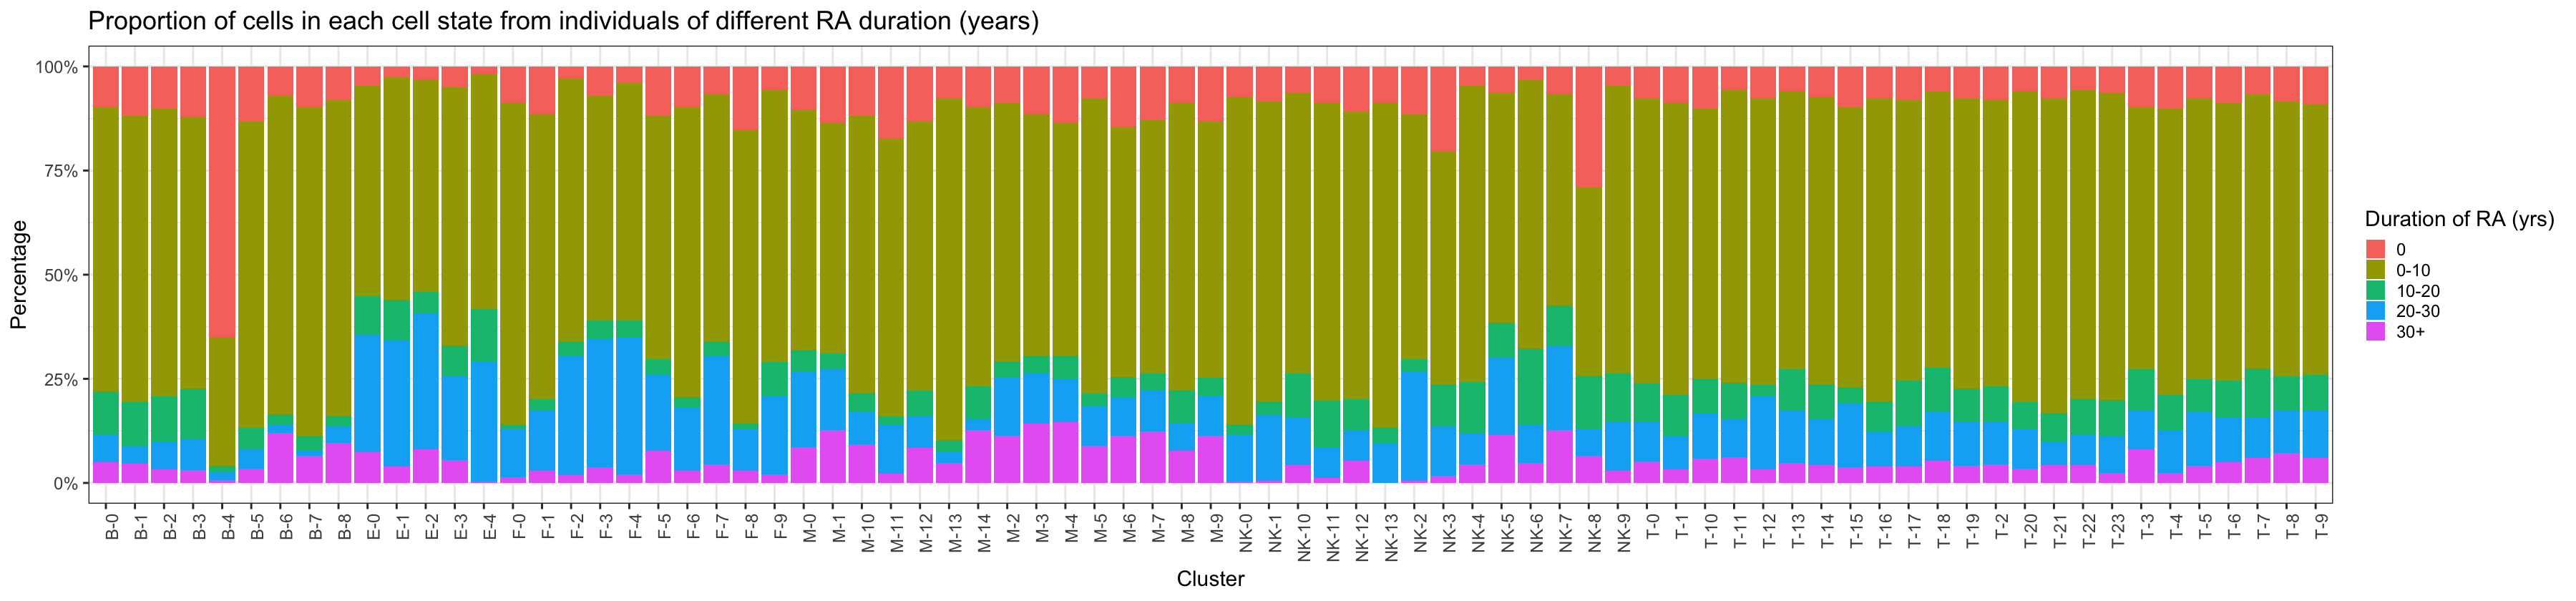

In [9]:
options(repr.plot.height=7, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster_number, fill = RA_duration_block)) + 
  geom_bar(position = "fill") +  # Use 'fill' position to stack bars to 100%
  scale_y_continuous(labels = scales::percent) +  # Convert y-axis to percentages
  labs(title = "Proportion of cells in each cell state from individuals of different RA duration (years)",
       x = "Cluster",
       y = "Percentage", 
      fill = "Duration of RA (yrs)") +
   theme_bw(base_size=18)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("./RA_durationblock_cellstate.png", dpi=300, height=7, width=30)

### Do cells from patients with different durations of RA have different disease scores?

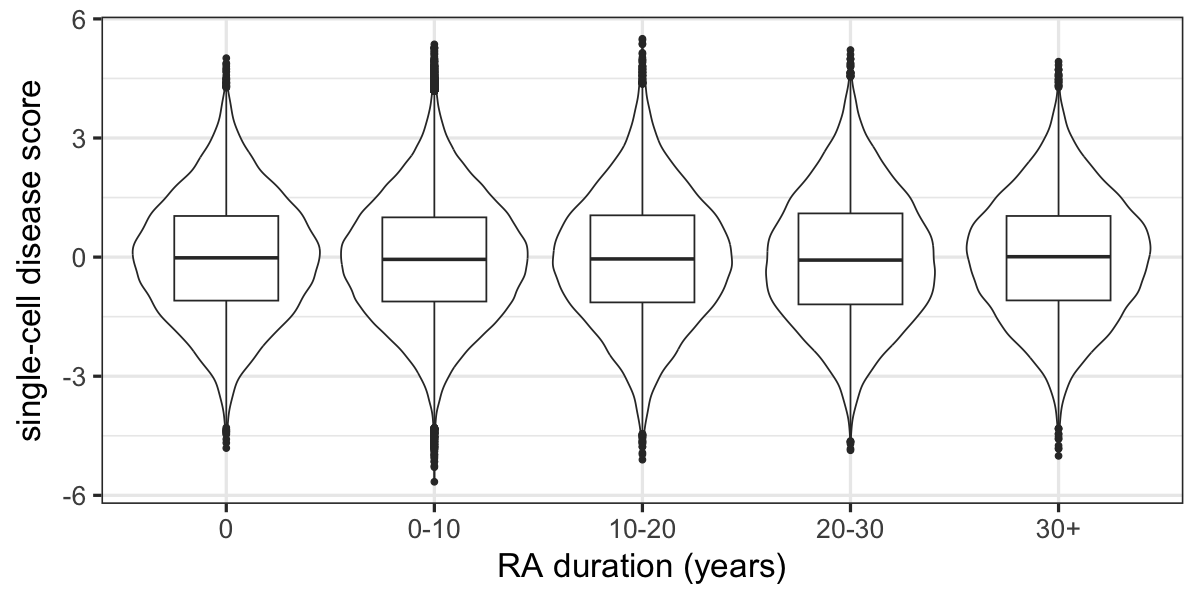

In [10]:
options(repr.plot.height=5, repr.plot.width=10)
ggplot(data=meta_data, aes(x=RA_duration_block, y=zscore)) + geom_violin() + 
geom_boxplot(width=0.5) + theme_bw(base_size=20) + labs(y="single-cell disease score", x="RA duration (years)")
ggsave("./RA_durationblock_scDRScore.png", dpi=300, width=7, height=5)

                      Df Sum Sq Mean Sq F value Pr(>F)  
RA_duration_block      4     28   7.029   3.024 0.0167 *
Residuals         262691 610665   2.325                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore ~ RA_duration_block, data = meta_data)

$RA_duration_block
                    diff          lwr         upr     p adj
0-10-0      -0.027768775 -0.056911923 0.001374373 0.0704821
10-20-0     -0.017938841 -0.060472677 0.024594994 0.7794920
20-30-0     -0.013649493 -0.048606649 0.021307663 0.8244565
30+-0        0.001295711 -0.041443759 0.044035182 0.9999894
10-20-0-10   0.009829933 -0.024264284 0.043924151 0.9346290
20-30-0-10   0.014119282 -0.009865948 0.038104512 0.4936187
30+-0-10     0.029064486 -0.005285926 0.063414898 0.1422158
20-30-10-20  0.004289348 -0.034890944 0.043469641 0.9982714
30+-10-20    0.019234553 -0.027022932 0.065492038 0.7883731
30+-20-30    0.014945204 -0.024458228 0.054348637 0.8393575



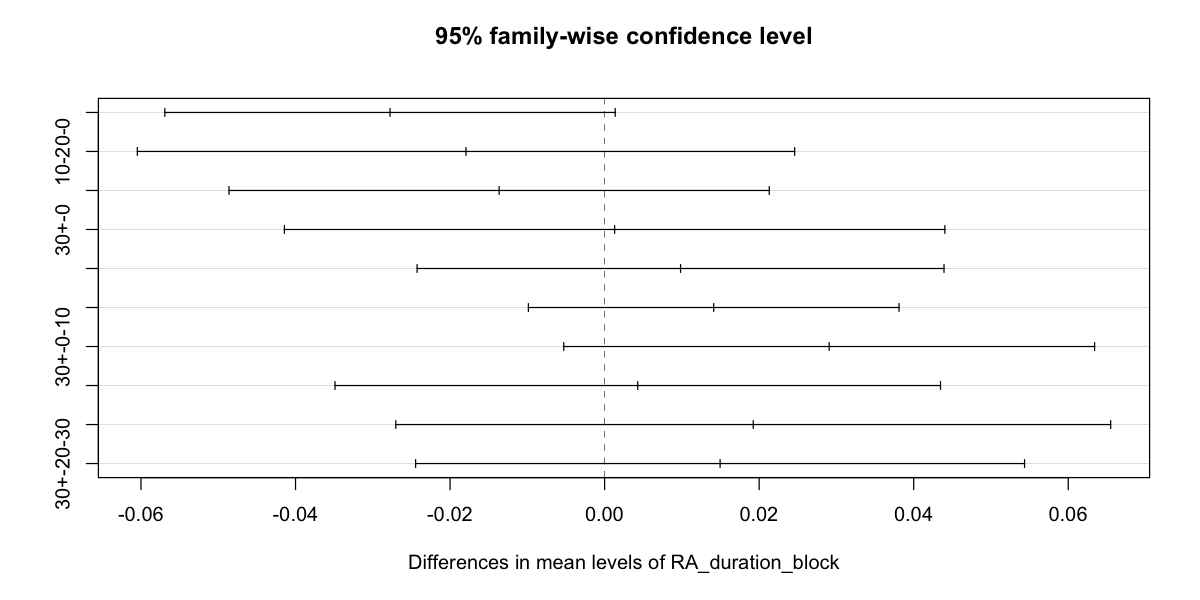

In [11]:
anova_model <- aov(zscore ~ RA_duration_block, data = meta_data)
# View the ANOVA results
summary(anova_model)

# Run the Tukey post-hoc test for pairwise comparisons
tukey_results <- TukeyHSD(anova_model)

# View the Tukey test results
print(tukey_results)

# Optionally, plot the Tukey test results
plot(tukey_results)

## UC

In [12]:
meta_data <- readRDS("/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/meta_qc_ulcerative_colitis_gut.rds")
cell_score <- data.frame(fread("/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_53/UC2017.score.gz"))

In [13]:
rownames(cell_score) <- cell_score$V1
cell_score <- cell_score[meta_data$cell,]
identical(cell_score$V1, meta_data$cell)
meta_data <- cbind(meta_data, cell_score)
any(is.na(cell_score))

[1] TRUE

[1] FALSE

In [14]:
colnames(meta_data)
meta_data[1:2,]

[1] "cell"         "sample"       "disease"      "cell_type"    "cluster"     
 [6] "nGene"        "nUMI"         "percent_mito" "V1"           "raw_score"   
[11] "norm_score"   "mc_pval"      "pval"         "nlog10_pval"  "zscore"

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,N7.EpiA.AACAAACTTCTCCG,0.05442833,0.79399960,0.2137862,0.2087501,0.6803733,0.81076570
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,N7.EpiA.AACTCGGACGTAAC,0.05455594,-0.08907721,0.5124875,0.5210424,0.2831269,-0.05276999


In [15]:
table(meta_data$disease)


     Healthy     Inflamed Non-inflamed 
       64190        79311        84710 

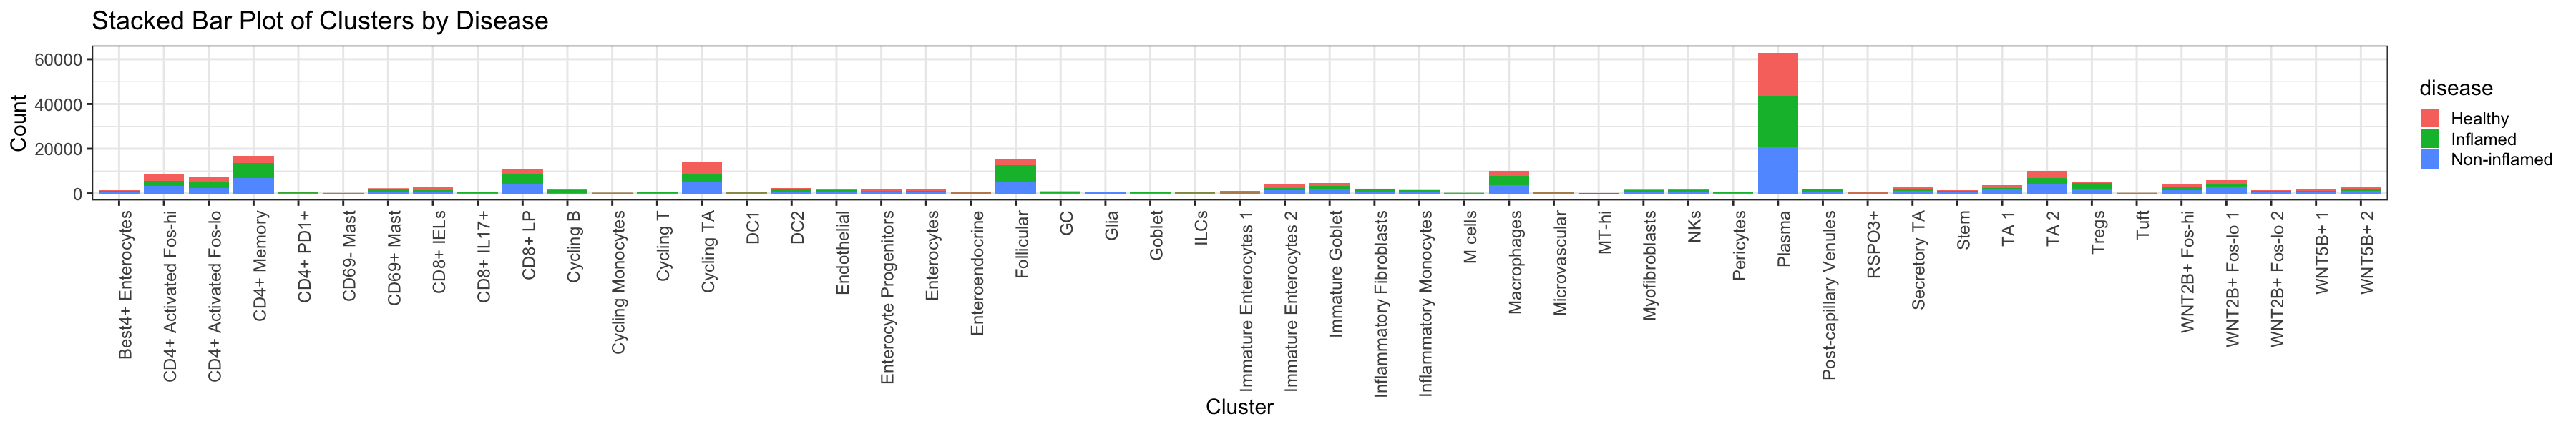

In [16]:
options(repr.plot.height=5, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster, fill = disease)) +  # 'fill' maps the 'disease' to different colors
  geom_bar(position = "stack") +                # Creates stacked bars
  labs(title = "Stacked Bar Plot of Clusters by Disease",
       x = "Cluster",
       y = "Count") +
  theme_bw(base_size=18)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))

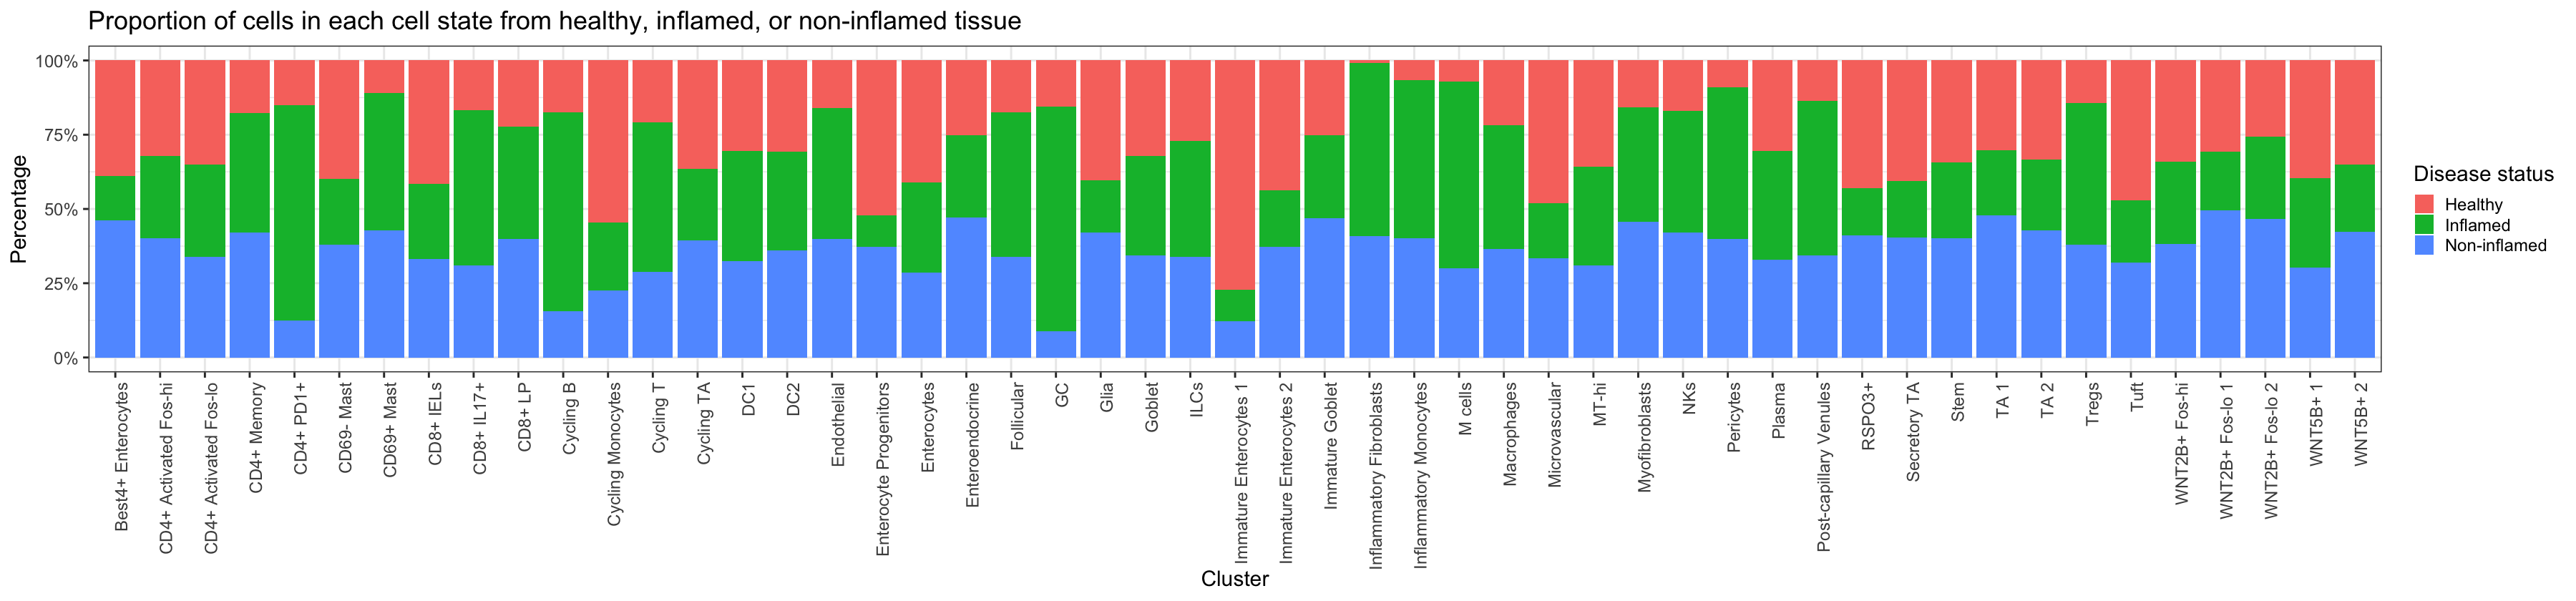

In [17]:
options(repr.plot.height=7, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster, fill = disease)) + 
  geom_bar(position = "fill") +  # Use 'fill' position to stack bars to 100%
  scale_y_continuous(labels = scales::percent) +  # Convert y-axis to percentages
  labs(title = "Proportion of cells in each cell state from healthy, inflamed, or non-inflamed tissue",
       x = "Cluster",
       y = "Percentage", 
      fill="Disease status") +
   theme_bw(base_size=18)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("./UC_diseasestatus_cellstate.png", dpi=300, width=30, height=7)

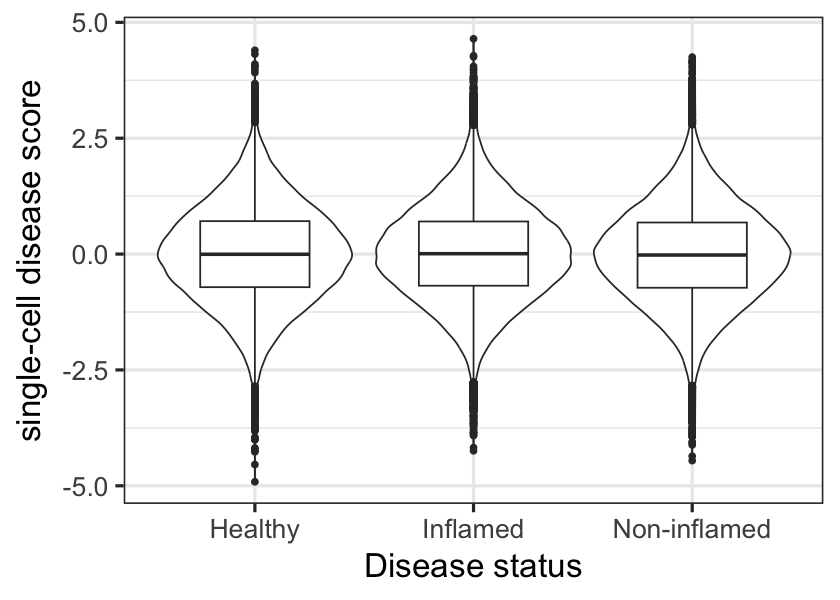

In [18]:
options(repr.plot.height=5, repr.plot.width=7)
ggplot(data=meta_data, aes(x=disease, y=zscore)) + geom_violin() + 
geom_boxplot(width=0.5) + theme_bw(base_size=20) + labs(y="single-cell disease score", x="Disease status")
ggsave("./UC_diseasestatus_scDRScore.png", dpi=300, width=7, height=5)

                Df Sum Sq Mean Sq F value   Pr(>F)    
disease          2     53  26.685   24.54 2.21e-11 ***
Residuals   228208 248182   1.088                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore ~ disease, data = meta_data)

$disease
                             diff          lwr          upr     p adj
Inflamed-Healthy       0.01710596  0.004129716  0.030082212 0.0056865
Non-inflamed-Healthy  -0.01895455 -0.031744488 -0.006164615 0.0014914
Non-inflamed-Inflamed -0.03606052 -0.048136923 -0.023984108 0.0000000



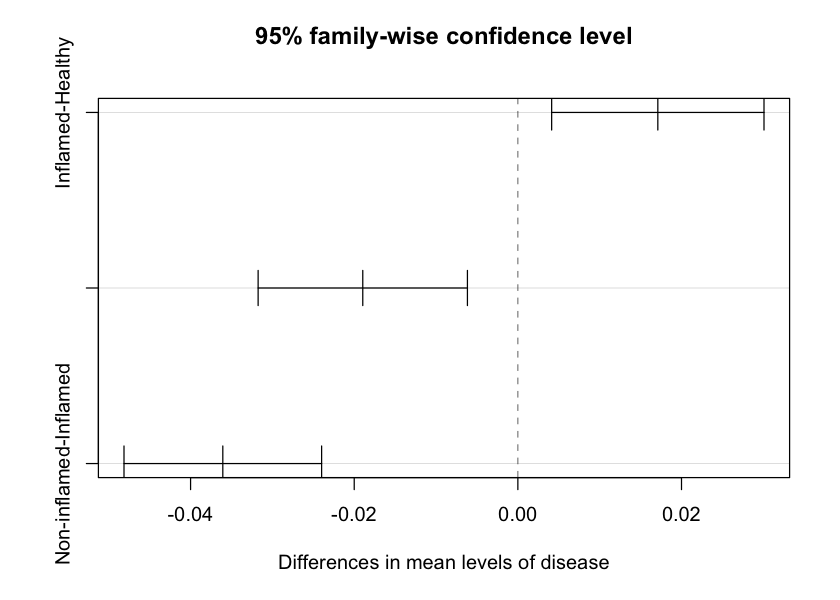

In [19]:
anova_model <- aov(zscore ~ disease, data = meta_data)
# View the ANOVA results
summary(anova_model)

# Run the Tukey post-hoc test for pairwise comparisons
tukey_results <- TukeyHSD(anova_model)

# View the Tukey test results
print(tukey_results)

# Optionally, plot the Tukey test results
plot(tukey_results)